# Gurobi: Installation and Licensing on Google Colab

We will walk through the details in this document (https://support.gurobi.com/hc/en-us/articles/4409582394769-Google-Colab-Installation-and-Licensing): the installation of Gurobi on google colab, including the following:
* Installation
* Size-Limited Trial License
* Full Gurobi License using WLS
* Usage Limit Issues
* Using a Local Runtime
* Conclusion
* Example


Why google colab?
*  Provides an easy way to use Gurobi with Python + Jupyter notebooks, *with no local software installation required*.
* Cloud based, file sharing, library install


The Gurobi solver can be used in Colab notebooks either with the free size-limited trial license that is installed by default or with a Web License Service (WLS) license which enables the full features of Gurobi.

## 1. Installation
To use Gurobi in a Colab notebook, we first need to install gurobipy into the notebook environment. This is done via a shell command in the notebook.



In [ ]:
!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(gp.gurobi.version())

(9, 5, 2)


You can install a minimum version of Gurobi into your environment (for example if you need to use a WLS license as described below) by running:

In [ ]:
# !pip install gurobipy>=9.5.1
!pip install gurobipy==9.5.2 ### (from versions: 9.1.0, 9.1.1, 9.1.2, 9.5.0, 9.5.1, 9.5.2b0, 9.5.2)

import gurobipy as gp

print(gp.gurobi.version())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(9, 5, 2)


Note that:
* Installed software in Colab notebooks is not persistent in some cases, so if you close and re-open the notebook you may lose installed packages. There is no issue with re-running this install command, so we recommend leaving it at the top of your notebook and running it before importing gurobipy.
* Before changing the version of gurobipy, we need to restart the colab runtime and re-run the above install commands.

## 2. Size-limited Trial License

When Gurobi is installed via pip using the commands above, gurobipy ships with a size-limited trial license which can solve models with at most 2000 variables and 2000 constraints. This license is for research, development, and evaluation purposes only. It may not be used in commercial applications.

This license allows you to use the solver without any further setup. You can create a gurobipy model directly. However, you will see a restricted license warning. You will also see an error message if you tried to solve problems with more than 2000 variables or more than 2000 constraints.


```
GurobiError: Model too large for size-limited license
```

if this license type is in use:

In [ ]:
model_size_limited = gp.Model()

Restricted license - for non-production use only - expires 2023-10-25


Toy example (optimal value: 100): 

$$\max_{x_1, \dots, x_{2001}} x_1$$
$$\text{subject to } \ \  x_1 \leq 100$$

In [ ]:
import numpy as np
from gurobipy import *

# Create variables
x1 = model_size_limited.addVar(vtype=GRB.CONTINUOUS, name='x1')
for i in range(2, 2002):
    model_size_limited.addVar(vtype=GRB.CONTINUOUS, name='x'+str(i))

# Set objective
model_size_limited.setObjective(x1, GRB.MAXIMIZE)

# Add constraint
model_size_limited.addConstr(x1 <= 100, 'c')

# same effect as below:
# model_size_limited.addVar(ub=10, vtype=GRB.CONTINUOUS, obj=1, name='x1')
# model_size_limited.addVars(np.linspace(2, 2001, 2000, dtype='int'), vtype=GRB.CONTINUOUS, name='x')

model_size_limited.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads


GurobiError: ignored

## 3. Full Gurobi License using WLS
Google Colab uses container-based environments to run your notebooks. Our Web License Service (WLS) can be used to set up a full-featured Gurobi environment in Colab. Please note that due to recent changes in Google Colab's architecture, only Gurobi versions later than v9.5.1 will work with this process.
1. Find or create your WLS license.
* As an academic user, follow the Web License Service instructions (https://www.gurobi.com/academia/academic-program-and-licenses/) on the Gurobi for Academics and Researchers page.
* As a commercial user, your WLS will be visible at license.gurobi.com for the owner of the license if you have the WLS license available.

2. Go to https://license.gurobi.com/manager/keys and create an API key for your WLS license. Give it an informative name to help you manage keys. **You will need to download the API key at the time you create it, as this is the only time you can access it directly.** The download button downloads a license file *gurobi.lic* with contents like the below.

3. Enter your API access ID, secret key, and license ID into the environment in your notebook code (To access the downloaded gurobi.lic license file, you could upload the file to google colab):

In [ ]:
WLSACCESSID="baceb1c5-d4c5-44a3-98b3-90ea88ea2fc1"
WLSSECRET="df1ec05e-dc6a-476b-b5f2-559f5d378cc0"
LICENSEID=854959

Code to create a licensed environment and a model which uses this API key:

In [ ]:
# Create environment with WLS license
e = gp.Env(empty=True)
e.setParam('WLSACCESSID', WLSACCESSID)
e.setParam('WLSSECRET', WLSSECRET)
e.setParam('LICENSEID', 854959)
e.start()

# Create the model within the Gurobi environment
model = gp.Model(env=e)

You can create one environment at the beginning of the notebook and re-use this for multiple models if needed.

Now we can access full features of Gurobi! Let's try how it works for our toy example:

In [ ]:
model_full_featured = gp.Model()

# Create variables
x1 = model_full_featured.addVar(vtype=GRB.CONTINUOUS, name='x1')
for i in range(2, 2002):
  model_size_limited.addVar(vtype=GRB.CONTINUOUS, name='x'+str(i))

# Set objective
model_full_featured.setObjective(x1, GRB.MAXIMIZE)

# Add constraint
model_full_featured.addConstr(x1 <= 100, 'c')

# same effect as below:
# model_size_limited.addVar(ub=10, vtype=GRB.CONTINUOUS, obj=1, name='x1')
# model_size_limited.addVars(np.linspace(2, 2001, 2000, dtype='int'), vtype=GRB.CONTINUOUS, name='x')

model_full_featured.optimize()

## 4. Usage Limit Issues
Once a gurobipy environment is created in Colab, it will not release the WLS tokens until the environment and all associated models are disposed of or the container shuts down. Please be aware that if you navigate away from the Colab notebook page without disposing of the environment (using model.dispose() and env.dispose()) or shutting down the runtime (colab menu -> runtime -> restart) then the WLS token will remain active. You may then run into usage limit issues, especially if you create many notebooks each using Gurobi. 

Hitting your usage limit would result in the following (or similar) error when creating a Gurobi environment:


```
Error 10030: Too many containers, 7 active containers for a baseline of 3
```



If you run into usage limits unexpectedly, you can check how many Colab notebooks you have running by opening a new notebook and selecting Runtime -> Manage Sessions from the menu bar. This will show all running notebooks in your Google user account. Terminating running notebooks will ensure that any WLS license tokens they are using are released. Note that it may take up to 5 minutes for the usage limit to reset and enable you to use Gurobi again.

\\

### Model.dispose() 
https://www.gurobi.com/documentation/9.5/refman/py_model_dispose.html

dispose( )

Free all resources associated with this 
*Model* object. After this method is called, this *Model* object must no longer be used.

\\

### Env.dispose()
https://www.gurobi.com/documentation/9.5/refman/py_env_dispose.html

dispose(force=False)
Free all resources associated with this *Env* object.

Dispose of all models created in this environment before disposing of this *Env* object. An error will be raised if this is not the case. Use the 'force' parameter to override this behavior, and to proceed with the disposal nevertheless. When doing so, any resource (memory, etc.), consumed by still existing models cannot be reclaimed.

After this method is called, this *Env* object must no longer be used.

\\

Example usage:

```
env = Env()
model = read("misc07.mps", env)
model.optimize()
model.dispose()
env.dispose()
```

## 5. Conclusion and References

When we tried to use Gurobi on google colab:

1. install and import gurobipy:


```
!pip install gurobipy
# !pip install gurobipy>=9.5.1
# !pip install gurobipy==9.5.2
import gurobipy as gp
```

2. Set up licensed environment and a model which uses your license if needed:

```
# a string of the form baceb1c5-d4c5-44a3-98b3-90ea88ea2fc1
WLSACCESSID = **********************   

# a string of the form df1ec05e-dc6a-476b-b5f2-559f5d378cc0
WLSSECRET = ************************  

# a six-digit integer
LICENSEID = 854959 

e = gp.Env(empty=True)
e.setParam('WLSACCESSID', WLSACCESSID)
e.setParam('WLSSECRET', WLSSECRET)
e.setParam('LICENSEID', 854959)
e.start()
```

We recommend the following recources to learn more details about Gurobi:
* A series of Gurobi Installation Guides: macOS (https://www.youtube.com/watch?v=ZcL-NmckTxQ), Windows (https://www.youtube.com/watch?v=fQVxuWOiPpI), Linux (https://www.youtube.com/watch?v=yNmeG6Wom1o)
* Academic and Research Licenses: https://support.gurobi.com/hc/en-us/sections/360008035632-Academic-and-Research-Licenses
* Gurobi Quick Start Guide: https://www.gurobi.com/documentation/9.5/quickstart_mac/attributes.html
* Gurobi Documentation (Python): https://www.gurobi.com/documentation/9.5/refman/py_python_api_overview.html


# Example

## What does Gurobi Optimizer do?

Although the website and jorgans are complex, what the software does is pretty straight forward: It takes inputs given by user and solves the complex problem. 

We can think it as an optimization problem calculator which lives in analytical space.

## Berlin Airlift Problem
Take the Berlin airlift problem in our lecture as an example:

1. Create a model (Turn on the "calculator")

In [ ]:
!pip install gurobipy
from gurobipy import *
import gurobipy as gp

m = gp.Model("Berlin")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Add variables
x1 = m.addVar(vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(vtype=GRB.INTEGER, name='x2')
x3 = m.addVar(vtype=GRB.INTEGER, name='x3')
x4 = m.addVar(vtype=GRB.INTEGER, name='x4')
x5 = m.addVar(vtype=GRB.INTEGER, name='x5')
x6 = m.addVar(vtype=GRB.INTEGER, name='x6')

# Set objective
m.setObjective(2*x1-x2+x3 , GRB.MAXIMIZE)
# Add constraints
m.addConstr(3*x1 +x2 +x3 +x4 <= 60, 'c0')
m.addConstr(3*x1 +x2 +x3 +x4 >= 60, 'c1')
m.addConstr(x1 - x2 +2*x3 +x5 >= 10, 'c2')
m.addConstr(x1 - x2 +2*x3 +x5 <= 10, 'c3')

m.addConstr(x1 +x2 -x3 +x6 <= 20, 'c4')
m.addConstr(x1 +x2 -x3 +x6 >= 20, 'c5')
m.addConstr(x1>=0, 'c6')
m.addConstr(x2>=0, 'c7')
m.addConstr(x3>=0, 'c8')
m.addConstr(x4>=0, 'c9')
m.addConstr(x5>=0, 'c10')
m.addConstr(x6>=0, 'c11')
# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 12 rows, 6 columns and 30 nonzeros
Model fingerprint: 0x589afea5
Variable types: 0 continuous, 6 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 6e+01]
Presolve removed 9 rows and 1 columns
Presolve time: 0.00s
Presolved: 3 rows, 5 columns, 11 nonzeros
Variable types: 0 continuous, 5 integer (0 binary)
Found heuristic solution: objective 20.0000000

Root relaxation: objective 2.500000e+01, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      25.0000000   25.00000  0.00%     -    0s

Explored 1 nodes (3 simplex iterations) in 0.05 seconds

In [ ]:
m.getVars()

[<gurobi.Var x1 (value 15.0)>,
 <gurobi.Var x2 (value 5.0)>,
 <gurobi.Var x3 (value -0.0)>,
 <gurobi.Var x4 (value 10.0)>,
 <gurobi.Var x5 (value -0.0)>,
 <gurobi.Var x6 (value -0.0)>]

In [ ]:
# Add variables
x1 = m.addVar(vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(vtype=GRB.INTEGER, name='x2')

# Set objective
m.setObjective(2*x1+3*x2, GRB.MAXIMIZE)
# Add constraints
m.addConstr(0.5*x1 +0.25*x2 <= 4, 'c0')
m.addConstr(x1 +3*x2 >= 20, 'c1')
m.addConstr(x1 +x2 <= 4, 'c2')
m.addConstr(x1 +x2 >= 4, 'c3')

m.addConstr(x1>=0, 'c6')
m.addConstr(x2>=0, 'c7')
# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 6 rows, 2 columns and 10 nonzeros
Model fingerprint: 0x325e0d3a
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-01, 3e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 2e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -



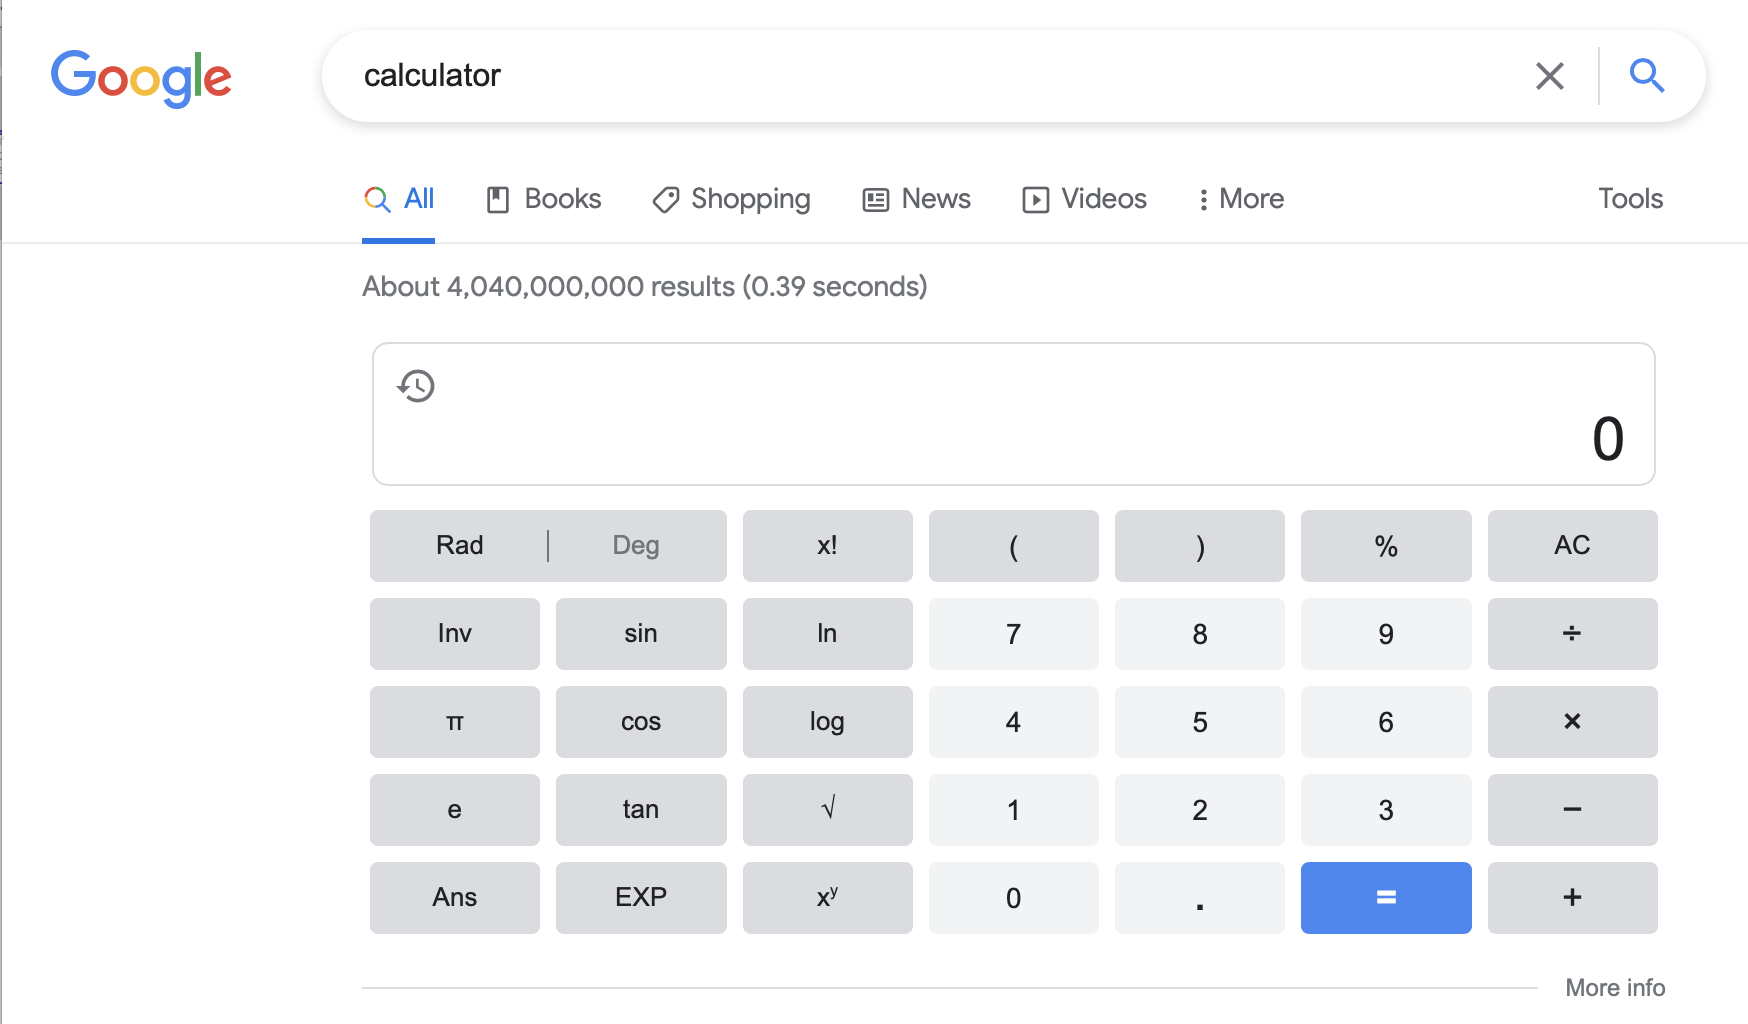

2. Describe the problem (add variables, set objective and add constraints / Enter expression we want to calculate in the calculator)


# **Problem 1**

In [ ]:
# Add variables
x1 = m.addVar(vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(vtype=GRB.INTEGER, name='x2')
x3 = m.addVar(vtype=GRB.INTEGER, name='x3')
x4 = m.addVar(vtype=GRB.INTEGER, name='x4')
x5 = m.addVar(vtype=GRB.INTEGER, name='x5')
# Set objective
m.setObjective(-10**(-2)*4*x1 + 10**(-2)*6*x2 + 10**(-2)*4*x3 + 10**(-2)*13*x4 + 10**(-2)*9*x5, GRB.MAXIMIZE)
# Add constraints
m.addConstr(x1 <= 20000, 'c0')
m.addConstr(10**(-3)*x4 + 10**(-4)*7.5*x5 <= 8, 'c1')
m.addConstr(x1 <= 2*(x3+x5), 'c2')
m.addConstr(x1 >= 2*(x3+x5), 'c3')
m.addConstr(x1 >= 2*(x2+x4), 'c4')
m.addConstr(x1 <= 2*(x2+x4), 'c5')
m.addConstr(x1>=0, 'c6')
m.addConstr(x2>=0, 'c7')
m.addConstr(x3>=0, 'c8')
m.addConstr(x4>=0, 'c9')
m.addConstr(x5>=0, 'c10')
# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 11 rows, 5 columns and 20 nonzeros
Model fingerprint: 0xa0a2de51
Variable types: 0 continuous, 5 integer (0 binary)
Coefficient statistics:
  Matrix range     [8e-04, 2e+00]
  Objective range  [4e-02, 1e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 2e+04]
Found heuristic solution: objective -0.0000000
Presolve removed 8 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 5 columns, 8 nonzeros
Variable types: 0 continuous, 5 integer (0 binary)

Root relaxation: objective 7.600000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     760.0000000  760.00000  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.09 seconds 

In [ ]:
m.getVars()

[<gurobi.Var x1 (value 20000.0)>,
 <gurobi.Var x2 (value 2000.0)>,
 <gurobi.Var x3 (value 10000.0)>,
 <gurobi.Var x4 (value 8000.0)>,
 <gurobi.Var x5 (value -0.0)>]

# **Problem 2**

In [ ]:
# Add variables
x1 = m.addVar(vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(vtype=GRB.INTEGER, name='x2')
x3 = m.addVar(vtype=GRB.INTEGER, name='x3')

# Set objective
m.setObjective(8*x1+13*x2-100*x3, GRB.MAXIMIZE)

# Add constraints
m.addConstr(x1 + 2*x2 <= 20000, 'c0')
m.addConstr(2*x1 + 3*x2 <= 35000, 'c1')
m.addConstr(3*x1 + 5*x2 - 200*x3 <= 1000, 'c2')
m.addConstr(x1>=0, 'c3')
m.addConstr(x2>=0, 'c4')
m.addConstr(x3>=0, 'c5')

# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 6 rows, 3 columns and 10 nonzeros
Model fingerprint: 0x7560dfb8
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [8e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 4e+04]
Found heuristic solution: objective 2664.0000000
Found heuristic solution: objective 114200.00000
Presolve removed 3 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 3 columns, 7 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)

Root relaxation: objective 1.180000e+05, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    118000.00000 118000.000  0.00%     -    0s

Explor

In [ ]:
m.getVars()

[<gurobi.Var x1 (value 10000.0)>,
 <gurobi.Var x2 (value 5000.0)>,
 <gurobi.Var x3 (value 270.0)>]

# **Problem 4**

In [ ]:
# Add variables
x1gas = m.addVar(vtype=GRB.INTEGER, name='x1gas')
x2gas = m.addVar(vtype=GRB.INTEGER, name='x2gas')
x3gas = m.addVar(vtype=GRB.INTEGER, name='x3gas')
x4gas = m.addVar(vtype=GRB.INTEGER, name='x4gas')
x5gas = m.addVar(vtype=GRB.INTEGER, name='x5gas')

x1oil = m.addVar(vtype=GRB.INTEGER, name='x1oil')
x2oil = m.addVar(vtype=GRB.INTEGER, name='x2oil')
x3oil = m.addVar(vtype=GRB.INTEGER, name='x3oil')
x4oil = m.addVar(vtype=GRB.INTEGER, name='x4oil')
x5oil = m.addVar(vtype=GRB.INTEGER, name='x5oil')

m1 = m.addVar(vtype=GRB.INTEGER, name='m1')
m2 = m.addVar(vtype=GRB.INTEGER, name='m2')
m3 = m.addVar(vtype=GRB.INTEGER, name='m3')

# Set objective
m.setObjective(12*(x1gas+x2gas+x3gas+x4gas+x5gas) + 5*(x1oil+x2oil+x3oil+x4oil+x5oil) - (3.4*m1+3*m2+2.6*m3+x1gas+x1oil+1.5*x3gas+1.5*x3oil), GRB.MAXIMIZE)

# Add constraints
m.addConstr(x1gas + 3*x2gas - x3gas + x4gas -x5gas <= 0, 'c0')
m.addConstr(-x1oil + x2oil -3*x3oil-x4oil-3*x5oil<= 0, 'c1')
m.addConstr(x2oil+x2gas+x1oil+x1gas-0.3*m1-0.4*m2-0.1*m3 <= 0, 'c2')
m.addConstr(x3oil+x3gas+x4oil+x4gas-0.5*m1-0.2*m2-0.3*m3<= 0, 'c3')
m.addConstr(x5oil+x5gas-0.8*m1-0.4*m2-0.2*m3 <= 0, 'c4')
m.addConstr(x1gas+x2gas+x3gas+x4gas+x5gas <= 2000, 'c5')
m.addConstr(x1oil+x2oil+x3oil+x4oil+x5oil <= 600, 'c6')

m.addConstr(x1gas>=0, 'c7')
m.addConstr(x2gas>=0, 'c8')
m.addConstr(x3gas>=0, 'c9')
m.addConstr(x4gas>=0, 'c10')
m.addConstr(x5gas>=0, 'c11')

m.addConstr(x1oil>=0, 'c12')
m.addConstr(x2oil>=0, 'c13')
m.addConstr(x3oil>=0, 'c14')
m.addConstr(x4oil>=0, 'c15')
m.addConstr(x5oil>=0, 'c16')

m.addConstr(m1>=0, 'c17')
m.addConstr(m2>=0, 'c18')
m.addConstr(m3>=0, 'c19')
# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 20 rows, 13 columns and 52 nonzeros
Model fingerprint: 0xf299253d
Variable types: 0 continuous, 13 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-01, 3e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+02, 2e+03]
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 6065.8000000
Presolve removed 13 rows and 0 columns
Presolve time: 0.00s
Presolved: 7 rows, 13 columns, 39 nonzeros
Variable types: 0 continuous, 13 integer (0 binary)
Found heuristic solution: objective 6075.9000000

Root relaxation: objective 2.147500e+04, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 21475.0000    0

In [ ]:
m.getVars()

[<gurobi.Var x1gas (value 0.0)>,
 <gurobi.Var x2gas (value 188.0)>,
 <gurobi.Var x3gas (value 0.0)>,
 <gurobi.Var x4gas (value 512.0)>,
 <gurobi.Var x5gas (value 1300.0)>,
 <gurobi.Var x1oil (value 0.0)>,
 <gurobi.Var x2oil (value 300.0)>,
 <gurobi.Var x3oil (value 0.0)>,
 <gurobi.Var x4oil (value 300.0)>,
 <gurobi.Var x5oil (value 0.0)>,
 <gurobi.Var m1 (value 1624.0)>,
 <gurobi.Var m2 (value 2.0)>,
 <gurobi.Var m3 (value 0.0)>]

# **Problem 5**

In [ ]:
# Add variables
x1 = m.addVar(vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(vtype=GRB.INTEGER, name='x2')
x3 = m.addVar(vtype=GRB.INTEGER, name='x3')
x4 = m.addVar(vtype=GRB.INTEGER, name='x4')
x5 = m.addVar(vtype=GRB.INTEGER, name='x5')
x6 = m.addVar(vtype=GRB.INTEGER, name='x6')
x7 = m.addVar(vtype=GRB.INTEGER, name='x7')
x8 = m.addVar(vtype=GRB.INTEGER, name='x8')
x9 = m.addVar(vtype=GRB.INTEGER, name='x9')
x10 = m.addVar(vtype=GRB.INTEGER, name='x10')

# Set objective
m.setObjective(36*x1 + 39*x2 + 42*x3 + 45*x4 + 51*x5 + 55*x6 + 63*x7 + 64*x8 + 66*x9 + 70*x10, GRB.MAXIMIZE)

# Add constraints
m.addConstr(0.69*((100-x1)*30+(100-x2)*34+(100-x3)*43+(100-x4)*47+(100-x5)*49+(100-x6)*53+(100-x7)*60+(100-x8)*62+(100-x9)*64+(100-x10)*66) + 0.3*((100-x1)*20+(100-x2)*25+(100-x3)*30+(100-x4)*35+(100-x5)*40+(100-x6)*45+(100-x7)*50+(100-x8)*55+(100-x9)*60+(100-x10)*65) >= 30000, 'c0')
m.addConstr(x1>=0, 'c1')
m.addConstr(x2>=0, 'c2')
m.addConstr(x3>=0, 'c3')
m.addConstr(x4>=0, 'c4')
m.addConstr(x5>=0, 'c5')
m.addConstr(x6>=0, 'c6')
m.addConstr(x7>=0, 'c7')
m.addConstr(x8>=0, 'c8')
m.addConstr(x9>=0, 'c9')
m.addConstr(x10>=0, 'c10')
m.addConstr(100>=x1, 'c11')
m.addConstr(100>=x2, 'c12')
m.addConstr(100>=x3, 'c13')
m.addConstr(100>=x4, 'c14')
m.addConstr(100>=x5, 'c15')
m.addConstr(100>=x6, 'c16')
m.addConstr(100>=x7, 'c17')
m.addConstr(100>=x8, 'c18')
m.addConstr(100>=x9, 'c19')
m.addConstr(100>=x10, 'c20')

# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 21 rows, 10 columns and 30 nonzeros
Model fingerprint: 0xd9b48e84
Variable types: 0 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [4e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 2e+04]
Found heuristic solution: objective 20484.000000
Presolve removed 20 rows and 0 columns
Presolve time: 0.00s
Presolved: 1 rows, 10 columns, 10 nonzeros
Variable types: 0 continuous, 10 integer (0 binary)
Found heuristic solution: objective 20509.000000

Root relaxation: objective 2.089371e+04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 20893.7088    0    1 20509.0000 20893.7088  1.88%     -    0s


In [ ]:
i = 0
for v in m.getVars():
  i+=1
  print(f'We need to keep %s = %g of stocks {i} for next year and sell now {100-v.x} stocks {i}' % (v.varName, v.x))
print()

We need to keep x1 = 100 of stocks 1 for next year and sell now 0.0 stocks 1
We need to keep x2 = 100 of stocks 2 for next year and sell now 0.0 stocks 2
We need to keep x3 = -0 of stocks 3 for next year and sell now 100.0 stocks 3
We need to keep x4 = -0 of stocks 4 for next year and sell now 100.0 stocks 4
We need to keep x5 = 100 of stocks 5 for next year and sell now 0.0 stocks 5
We need to keep x6 = 35 of stocks 6 for next year and sell now 65.0 stocks 6
We need to keep x7 = 99 of stocks 7 for next year and sell now 1.0 stocks 7
We need to keep x8 = 2 of stocks 8 for next year and sell now 98.0 stocks 8
We need to keep x9 = -0 of stocks 9 for next year and sell now 100.0 stocks 9
We need to keep x10 = -0 of stocks 10 for next year and sell now 100.0 stocks 10



In [ ]:
# Add variables
x = m.addVar(vtype=GRB.INTEGER, name='x')
y = m.addVar(vtype=GRB.INTEGER, name='y')

# Set objective
m.setObjective(30000*x + 20000*y, GRB.MAXIMIZE)

# Add constraints
m.addConstr(x + y <= 44, 'c0')
m.addConstr(16*x + 8*y <= 512, 'c1')
m.addConstr(9000*x + 5000*y <= 300000, 'c2')

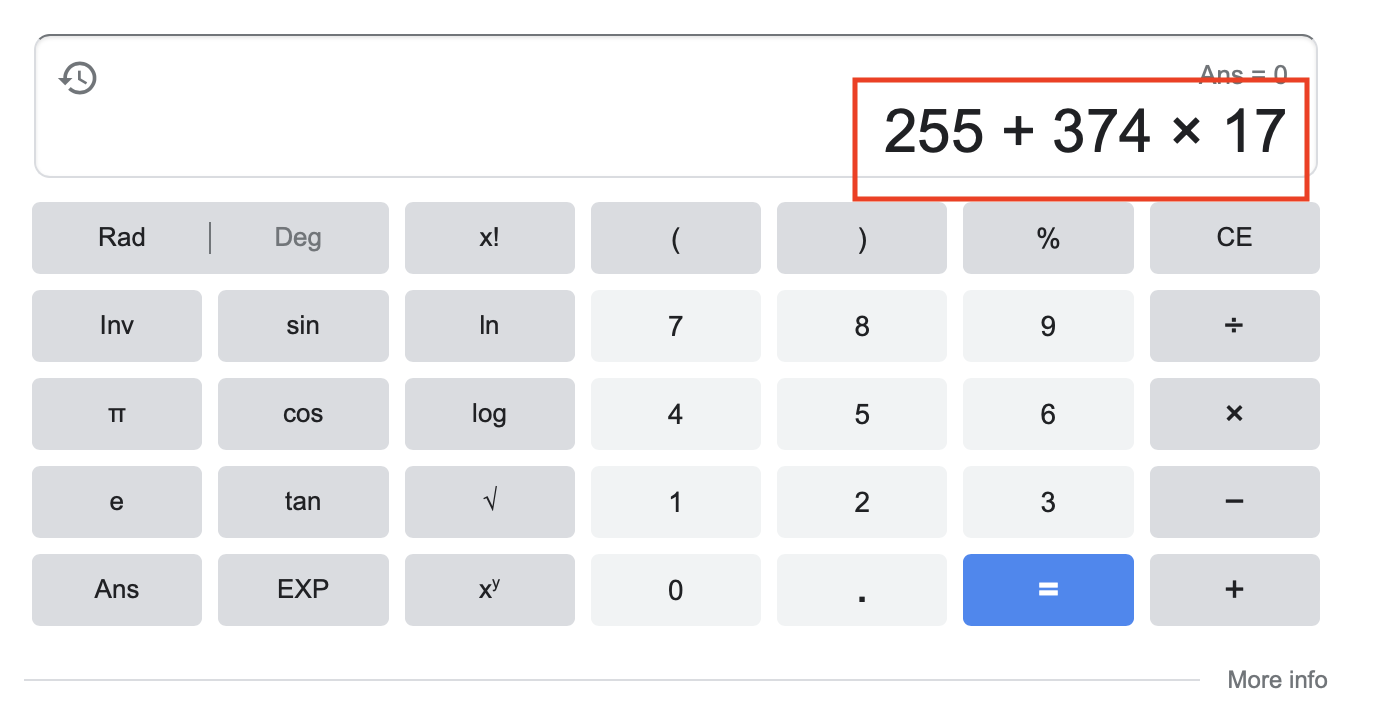

3. Ask computer to solve the problem (Execute *model.optimize( )* / Hit the $"="$ botton in the calculator)

In [ ]:
# Optimize model
m.optimize()

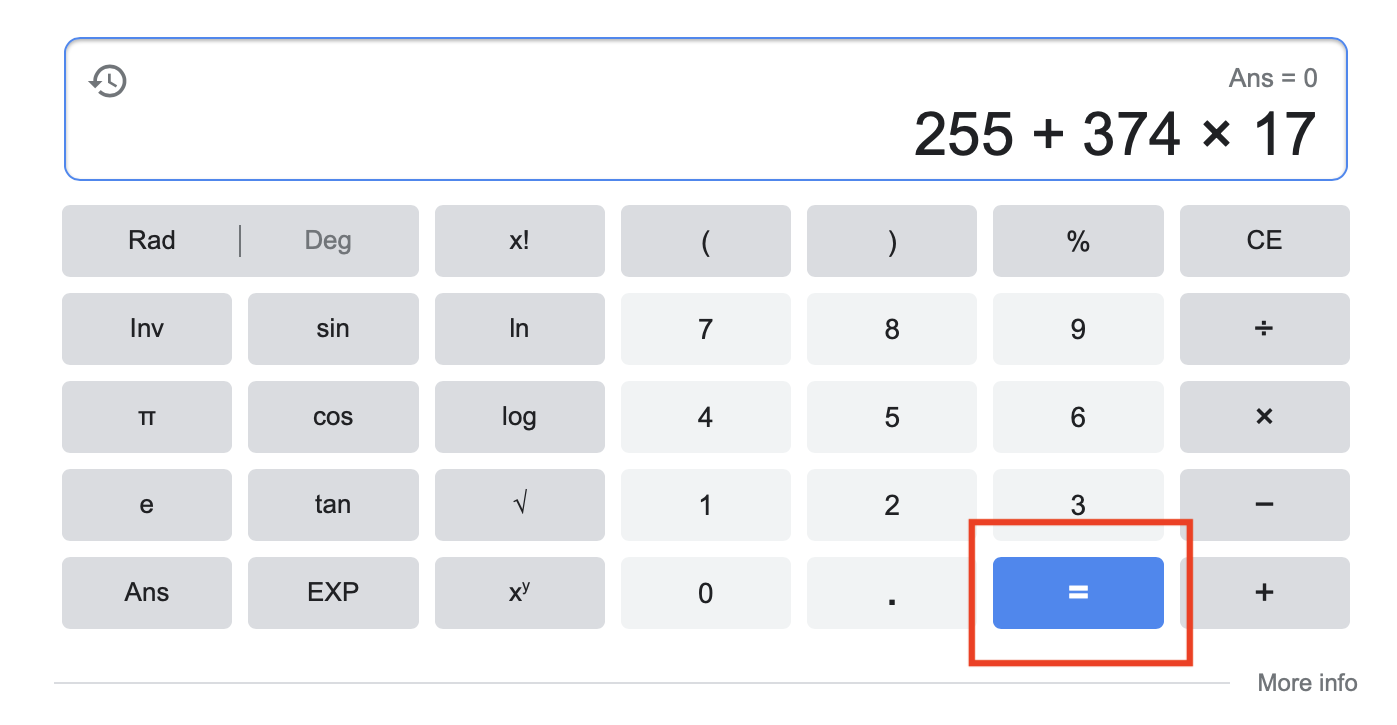

4. Get the optimal solution

In [ ]:
for v in m.getVars():
  print('%s %g' % (v.varName, v.x))
print()

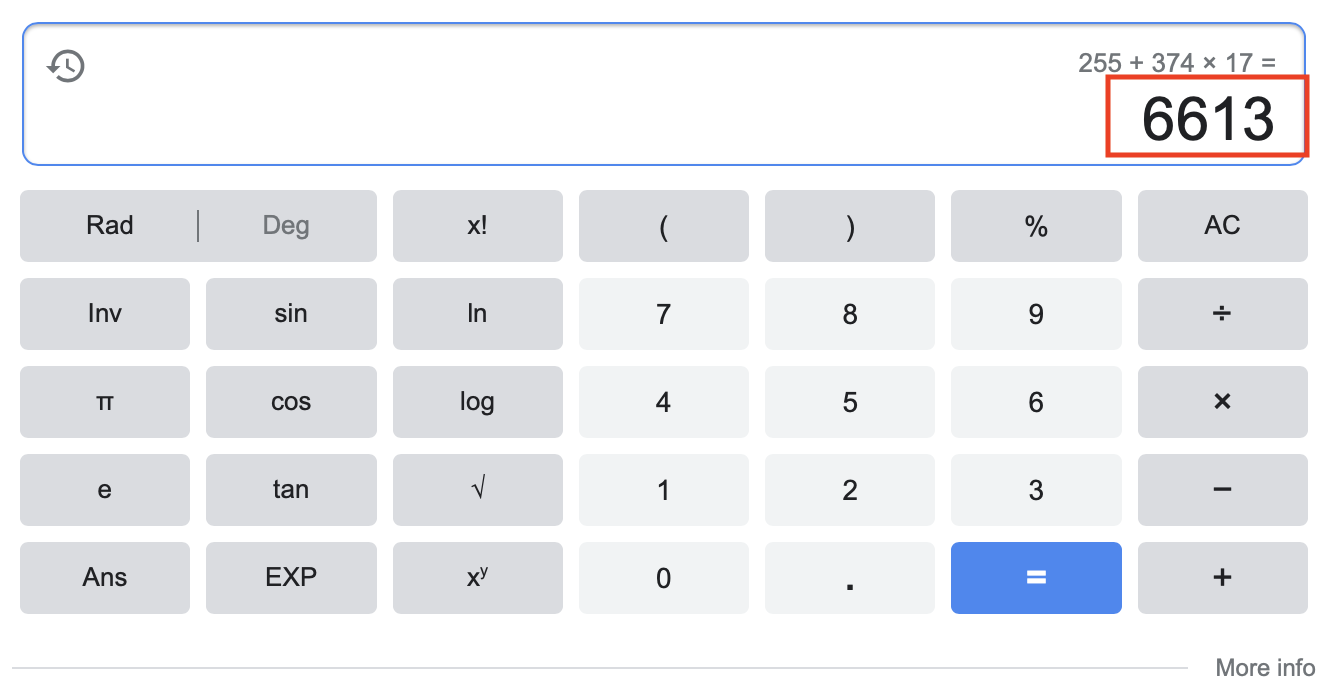